In [1]:
# Data source

# P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
#   Modeling wine preferences by data mining from physicochemical properties.
#   In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.
#
#   Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
#                 [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
#                 [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib


In [61]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score, f1_score, \
    precision_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [26]:
# Get data from csv file

rice_data = arff.loadarff("Data/Rice_Cammeo_Osmancik.arff")
rice_data = pd.DataFrame(rice_data[0])

print(rice_data)

         Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0     15231.0  525.578979         229.749878          85.093788      0.928882   
1     14656.0  494.311005         206.020065          91.730972      0.895405   
2     14634.0  501.122009         214.106781          87.768288      0.912118   
3     13176.0  458.342987         193.337387          87.448395      0.891861   
4     14688.0  507.166992         211.743378          89.312454      0.906691   
...       ...         ...                ...                ...           ...   
3805  11441.0  415.858002         170.486771          85.756592      0.864280   
3806  11625.0  421.390015         167.714798          89.462570      0.845850   
3807  12437.0  442.498993         183.572922          86.801979      0.881144   
3808   9882.0  392.296997         161.193985          78.210480      0.874406   
3809  11434.0  404.709991         161.079269          90.868195      0.825692   

      Convex_Area    Extent

In [48]:
# Clean data

rice_data['Class'] = LabelEncoder().fit_transform(rice_data['Class'])
print (rice_data['Class'])

0       0
1       0
2       0
3       0
4       0
       ..
3805    1
3806    1
3807    1
3808    1
3809    1
Name: Class, Length: 3810, dtype: int64


In [44]:
# Split test data from training data

training_data, test_data = train_test_split(rice_data, test_size = 0.2, random_state = 0)

print(rice_data.size)
print(training_data.size)
print(test_data.size)

30480
24384
6096


In [46]:
# create decision tree

random_forest = RandomForestClassifier()

# test data
features_train = training_data.drop('Class', axis=1)

# Target data
target_train = training_data['Class']

# fit red data to random forest by splitting the values (data for testing, actual result)
random_forest.fit(features_train, target_train)

RandomForestClassifier()

Accuracy:   1.0
precision:  1.0
Recall:     1.0
F1-Score:   1.0


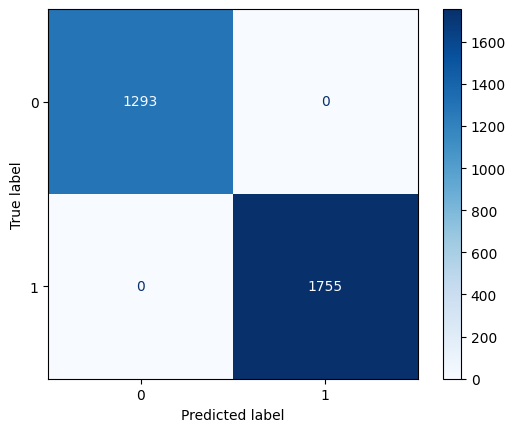

In [64]:
# Show confusion matrix

actual = target_train
prediction = random_forest.predict(features_train)

cm = confusion_matrix(actual, prediction)

display_labels = np.unique(actual)

display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = display_labels)
print("Accuracy:  ", accuracy_score(prediction, actual))
print("precision: ", precision_score(prediction, actual))
print("Recall:    ", recall_score(prediction, actual))
print("F1-Score:  ", f1_score(prediction, actual))

display.plot(cmap='Blues')

In [ ]:
#